In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.utils import np_utils
import tensorflow

Using TensorFlow backend.


## Data Preparation

In [21]:
train = pd.read_csv('fashionMnistDataset/fashion-mnist_train.csv').values
test = pd.read_csv('fashionMnistDataset/fashion-mnist_test.csv').values

print(train.shape)
print(test.shape)


(60000, 785)
(10000, 785)


In [22]:
# Training Data
X_train = train[:,1:]
Y_train = train[:,0]

X_train = X_train/255.0

# Testing Data
X_test = test[:,1:]
Y_test = test[:,0]

X_test = X_test/255.0

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [23]:
np.unique(Y_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

In [24]:
X_train = X_train.reshape((-1,28,28,1))
Y_train = np_utils.to_categorical(Y_train)

X_test = X_test.reshape((-1,28,28,1))
Y_test = np_utils.to_categorical(Y_test)

In [25]:
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(60000, 28, 28, 1) (60000, 10)
(10000, 28, 28, 1) (10000, 10)


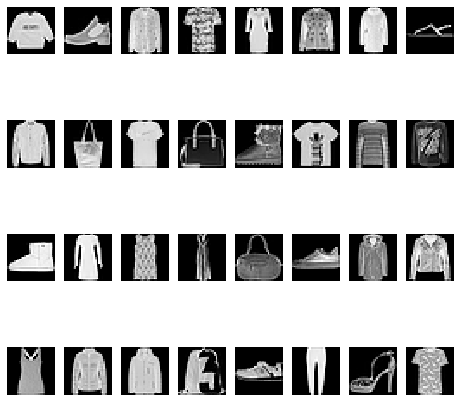

In [43]:
# Data Visualization
k = 32
plt.figure(figsize=(8,8))
for _ in range(k):
    i = 
    plt.subplot(4,8,i+1)
    plt.imshow(X_train[i].reshape((28,28)),cmap='gray')
    plt.axis('off')
plt.show()

## CNN Model

In [62]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1))) # no of filters,shape of filters
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(Dropout(0.25)) # 25% of the neurons will be randomly dropped
model.add(MaxPooling2D(2,2)) # filter size, stride
model.add(Convolution2D(128,(3,3),activation='relu'))
model.add(Dropout(0.25)) # 25% of the neurons will be randomly dropped
model.add(Convolution2D(32,(5,5),activation='relu'))
model.add(Convolution2D(8,(5,5),activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax')) # prob among 10 classes
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_73 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_20 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 10, 10, 128)       73856     
_________________________________________________________________
dropout_21 (Dropout)         (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 6, 6, 32)          102432    
__________

In [63]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [64]:
hist = model.fit(X_train,Y_train,epochs=10,batch_size=512,shuffle=True,validation_data=[X_test,Y_test])

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 428s 7ms/step - loss: 1.1504 - acc: 0.5989 - val_loss: 0.6309 - val_acc: 0.7652
Epoch 2/10
60000/60000 [==============================] - 404s 7ms/step - loss: 0.5372 - acc: 0.7991 - val_loss: 0.5055 - val_acc: 0.8186
Epoch 3/10
60000/60000 [==============================] - 409s 7ms/step - loss: 0.4339 - acc: 0.8443 - val_loss: 0.3990 - val_acc: 0.8644
Epoch 4/10
60000/60000 [==============================] - 404s 7ms/step - loss: 0.3758 - acc: 0.8654 - val_loss: 0.3801 - val_acc: 0.8715
Epoch 5/10
60000/60000 [==============================] - 408s 7ms/step - loss: 0.3406 - acc: 0.8782 - val_loss: 0.3408 - val_acc: 0.8793
Epoch 6/10
60000/60000 [==============================] - 407s 7ms/step - loss: 0.3117 - acc: 0.8869 - val_loss: 0.3037 - val_acc: 0.8948
Epoch 7/10
60000/60000 [==============================] - 407s 7ms/step - 

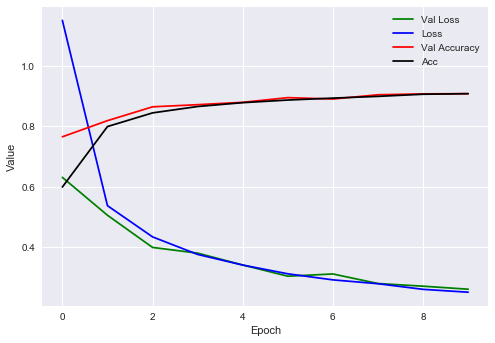

In [67]:
plt.style.use('seaborn')
plt.plot(hist.history['val_loss'],c='g',label='Val Loss')
plt.plot(hist.history['loss'],c='b',label='Loss')

plt.plot(hist.history['val_acc'],c='r',label='Val Accuracy')
plt.plot(hist.history['acc'],c='black',label='Acc')

plt.xlabel("Epoch")
plt.ylabel("Value")
plt.legend()
plt.show()

In [69]:
y_pred = model.predict(X_test,batch_size=256)

In [95]:
c = 0
for i in range(y_pred.shape[0]):
    if np.argmax(Y_test[i]) == np.argmax(y_pred[i]):
        c+=1;
print(c)

acc = (str) (c/y_pred.shape[0])

9079


In [99]:
print("Accuracy is : " + acc)

Accuracy is : 0.9079


In [100]:
# k = 67
# print(y_pred[k])
# print(np.max(y_pred[k]))
# print(np.argmax(y_pred[k]))

# print(Y_test[k])
# print(np.max(Y_test[k]))
# print(np.argmax(Y_test[k]))